In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import keras
from keras.applications.inception_v3 import InceptionV3

from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataSetOfLungCancer/Lung_Cancer/Train70',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataSetOfLungCancer/Lung_Cancer/Validation10',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataSetOfLungCancer/Lung_Cancer/Test20',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 10537 images belonging to 3 classes.
Found 1504 images belonging to 3 classes.
Found 3013 images belonging to 3 classes.


In [ ]:
InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False, 
    weights = 'imagenet', 
    input_shape=(224,224,3),
    )

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
InceptionV3.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  InceptionV3,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'), 
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 1024)              52429824  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 74,758,947
Trainable params: 52,956,163
No

In [ ]:
history = model.fit(
    x = train, 
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
330/330 [==============================] - 1510s 5s/step - loss: 0.8155 - accuracy: 0.8695 - val_loss: 0.2219 - val_accuracy: 0.9189
Epoch 2/10
330/330 [==============================] - 219s 664ms/step - loss: 0.2266 - accuracy: 0.9152 - val_loss: 0.1413 - val_accuracy: 0.9501
Epoch 3/10
330/330 [==============================] - 219s 663ms/step - loss: 0.1967 - accuracy: 0.9227 - val_loss: 0.1521 - val_accuracy: 0.9415
Epoch 4/10
330/330 [==============================] - 217s 657ms/step - loss: 0.1888 - accuracy: 0.9256 - val_loss: 0.1458 - val_accuracy: 0.9495
Epoch 5/10
330/330 [==============================] - 216s 654ms/step - loss: 0.1866 - accuracy: 0.9279 - val_loss: 0.1168 - val_accuracy: 0.9568
Epoch 6/10
330/330 [==============================] - 216s 653ms/step - loss: 0.1802 - accuracy: 0.9307 - val_loss: 0.1207 - val_accuracy: 0.9508
Epoch 7/10
330/330 [==============================] - 215s 653ms/step - loss: 0.1648 - accuracy: 0.9362 - val_loss: 0.1053 - v

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

95/95 [==============================] - 463s 5s/step - loss: 0.0911 - accuracy: 0.9635
Accuracy: 0.9634915590286255
Loss: 0.09105290472507477


In [ ]:
test.class_indices

{'Lung-Benign_Tissue': 0,
 'Lung_Adenocarcinoma': 1,
 'Lung_Squamous_Cell_Carcinoma': 2}

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinoma']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

95/95 [==============================] - 30s 302ms/step
                              precision    recall  f1-score   support

          Lung-Benign_Tissue       1.00      1.00      1.00      1013
         Lung_Adenocarcinoma       0.93      0.96      0.95      1000
Lung_Squamous_Cell_Carcinoma       0.97      0.93      0.95      1000

                    accuracy                           0.96      3013
                   macro avg       0.96      0.96      0.96      3013
                weighted avg       0.96      0.96      0.96      3013



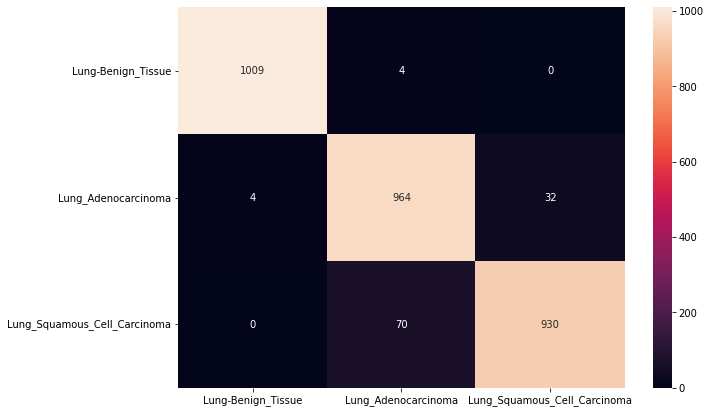

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinoma']],
                  columns = [i for i in ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinoma']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

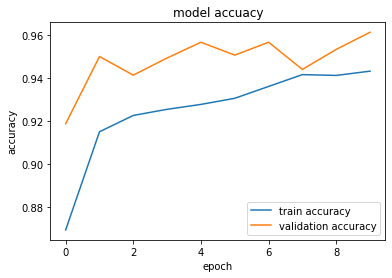

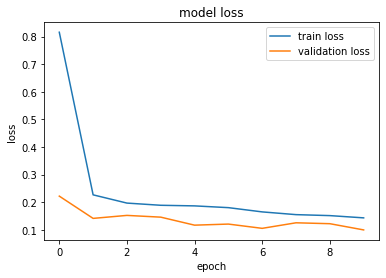

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()